# LOAN DEFAULT DATASET

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
train = pd.read_csv("C:/Users/user/Desktop/E-LEARNING/DF Assignments/Loan Default Dataset/Loan_Default.csv")

train.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
train.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [5]:
train.info()
train.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

0

The dataset contains 148,670 rows and 34 columns, with 21 categorical, 8 numeric (float), and 5 integer columns.  
The target `Status` is complete and binary. Some key financial features have high missing values (25% in rate_of_interest, Interest_rate_spread, Upfront_charges; 10% in property_value and LTV).  
`ID` is a unique identifier and should be dropped. Categorical variables require encoding, and numeric features may need outlier handling.


In [6]:
# Statistical Summary
train.describe(include='all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


Numeric columns show wide ranges and some extreme outliers (loan_amount, Upfront_charges, LTV).  
Key numeric features have missing values (rate_of_interest, Interest_rate_spread, Upfront_charges, property_value, LTV, income, dtir1).  
Categorical columns are mostly low-cardinality and ready for encoding.  
Target `Status` is binary and imbalanced (~25% positive).  
Columns `ID` and `year` are not predictive and should be dropped.

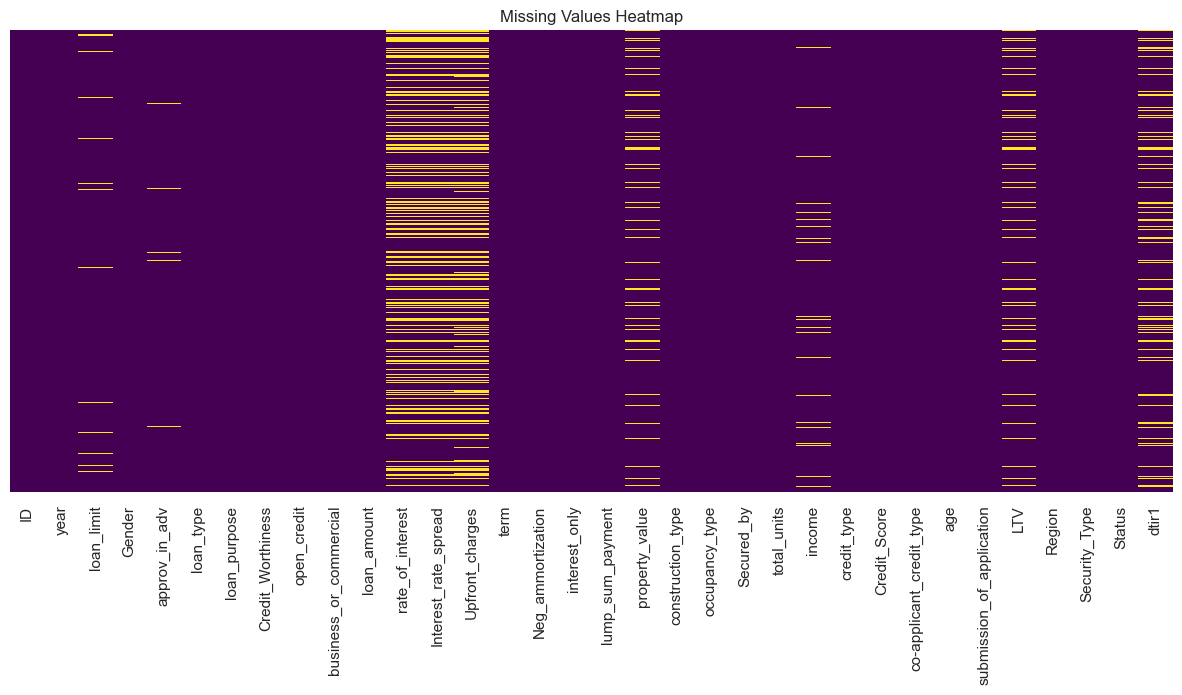

<Axes: xlabel='None'>

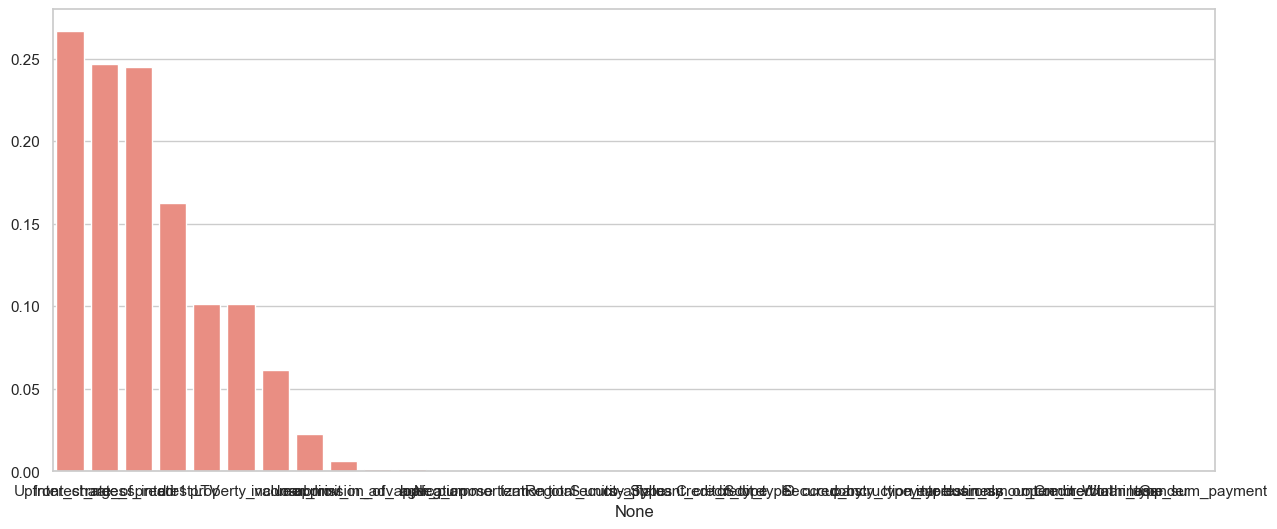

In [7]:
import seaborn as sns
df = train.copy()
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,6)

# 1 Missing Values Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 2 Missing Values Barplot (percentage)
missing_pct = df.isna().mean().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color="salmon")  


Missing values analysis shows that `Upfront_charges`, `Interest_rate_spread`, and `rate_of_interest` have the highest missing fractions (~25-27%), while `dtir1`, `LTV`, and `property_value` have moderate missingness (~10-16%).  
The heatmap reveals patterns: some features are missing together (MNAR), while others are scattered (MAR).  
High-missing features may require imputation, indicator variables, or domain-specific handling; low-missing features can be filled using median or mode.


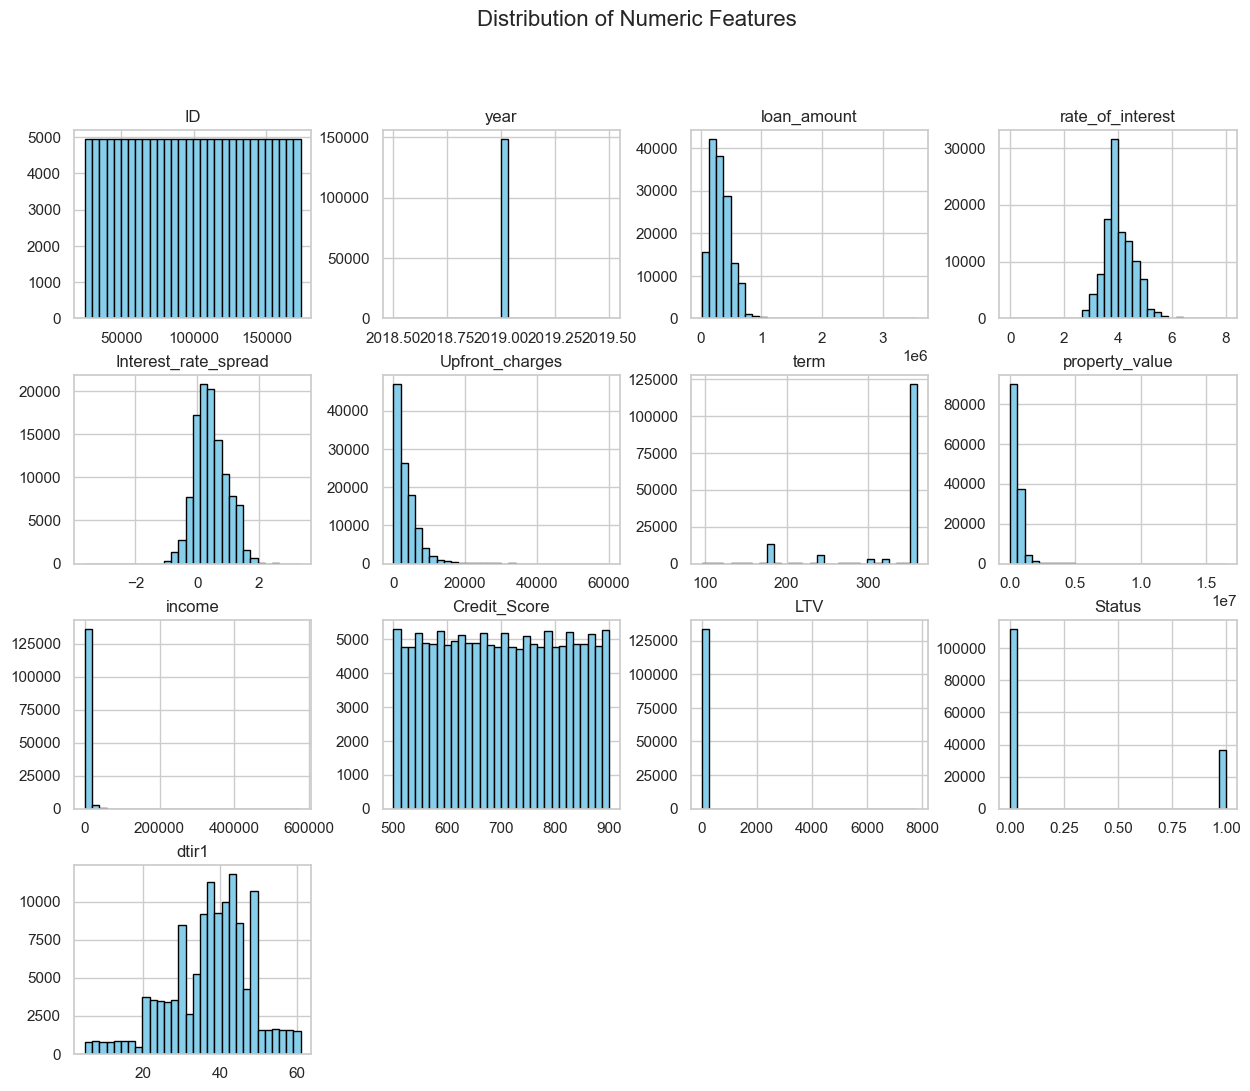

In [8]:

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for each numeric column
df[num_cols].hist(bins=30, figsize=(15,12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


Numeric feature distributions reveal several patterns: 

- ID and year are non-predictive (uniform / single-value) and should be dropped.
- Right-skewed features (income, loan_amount, LTV, property_value, Upfront_charges) contain outliers and may benefit from log transformation or capping.
- Approximately normal features (rate_of_interest, Interest_rate_spread, dtir1) are suitable for standard scaling; missing values can be imputed with median.
- Categorical / binary numeric-like features (Status, term) should be encoded appropriately.


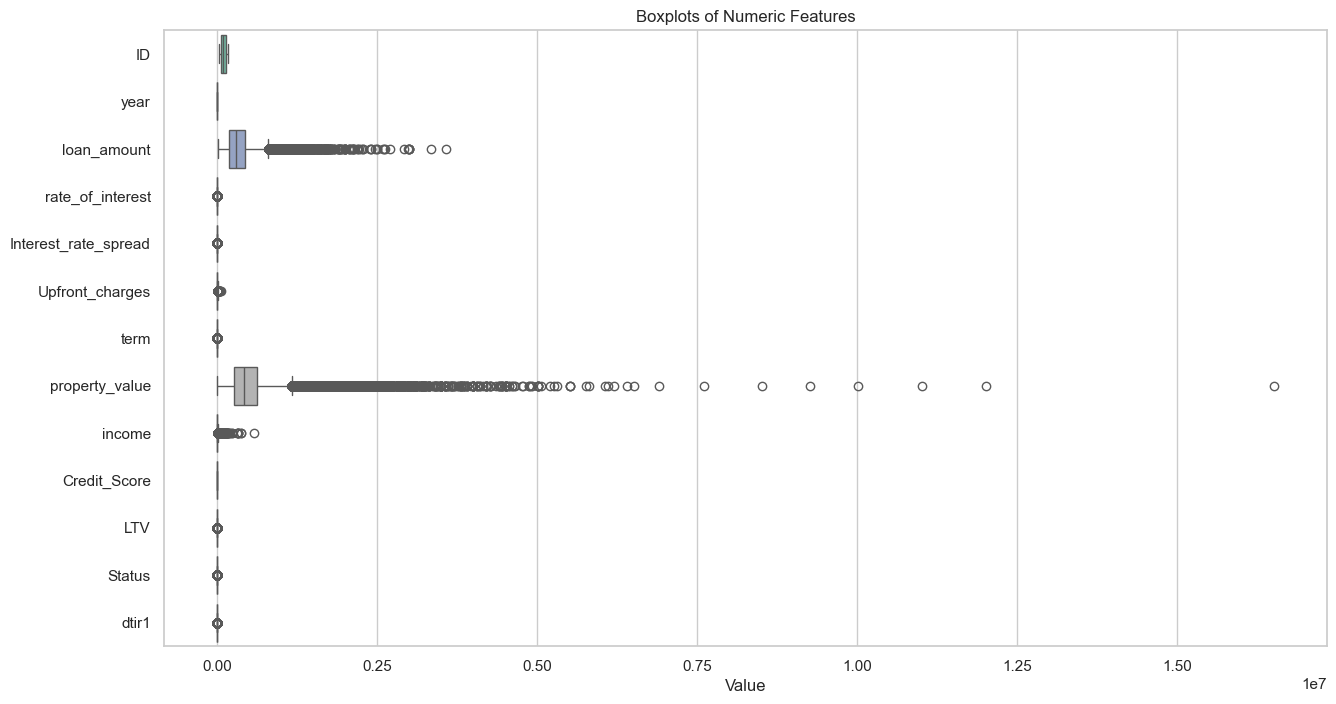

In [9]:
# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for each numeric column
plt.figure(figsize=(15,8))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Boxplots of Numeric Features")
plt.xlabel("Value")
plt.show()


Boxplots confirm extreme right-skewness and outliers in loan_amount, property_value, and income. 
Moderately distributed features like rate_of_interest, Interest_rate_spread, dtir1, and term show minor outliers. 
ID and year are non-predictive, while Status is binary. 

Implications:
- Apply log transformation or capping for highly skewed features.
- Scale numeric features due to wide range differences.
- Retain structural zeros (Upfront_charges) as-is.
- Drop non-informative features (ID, year).


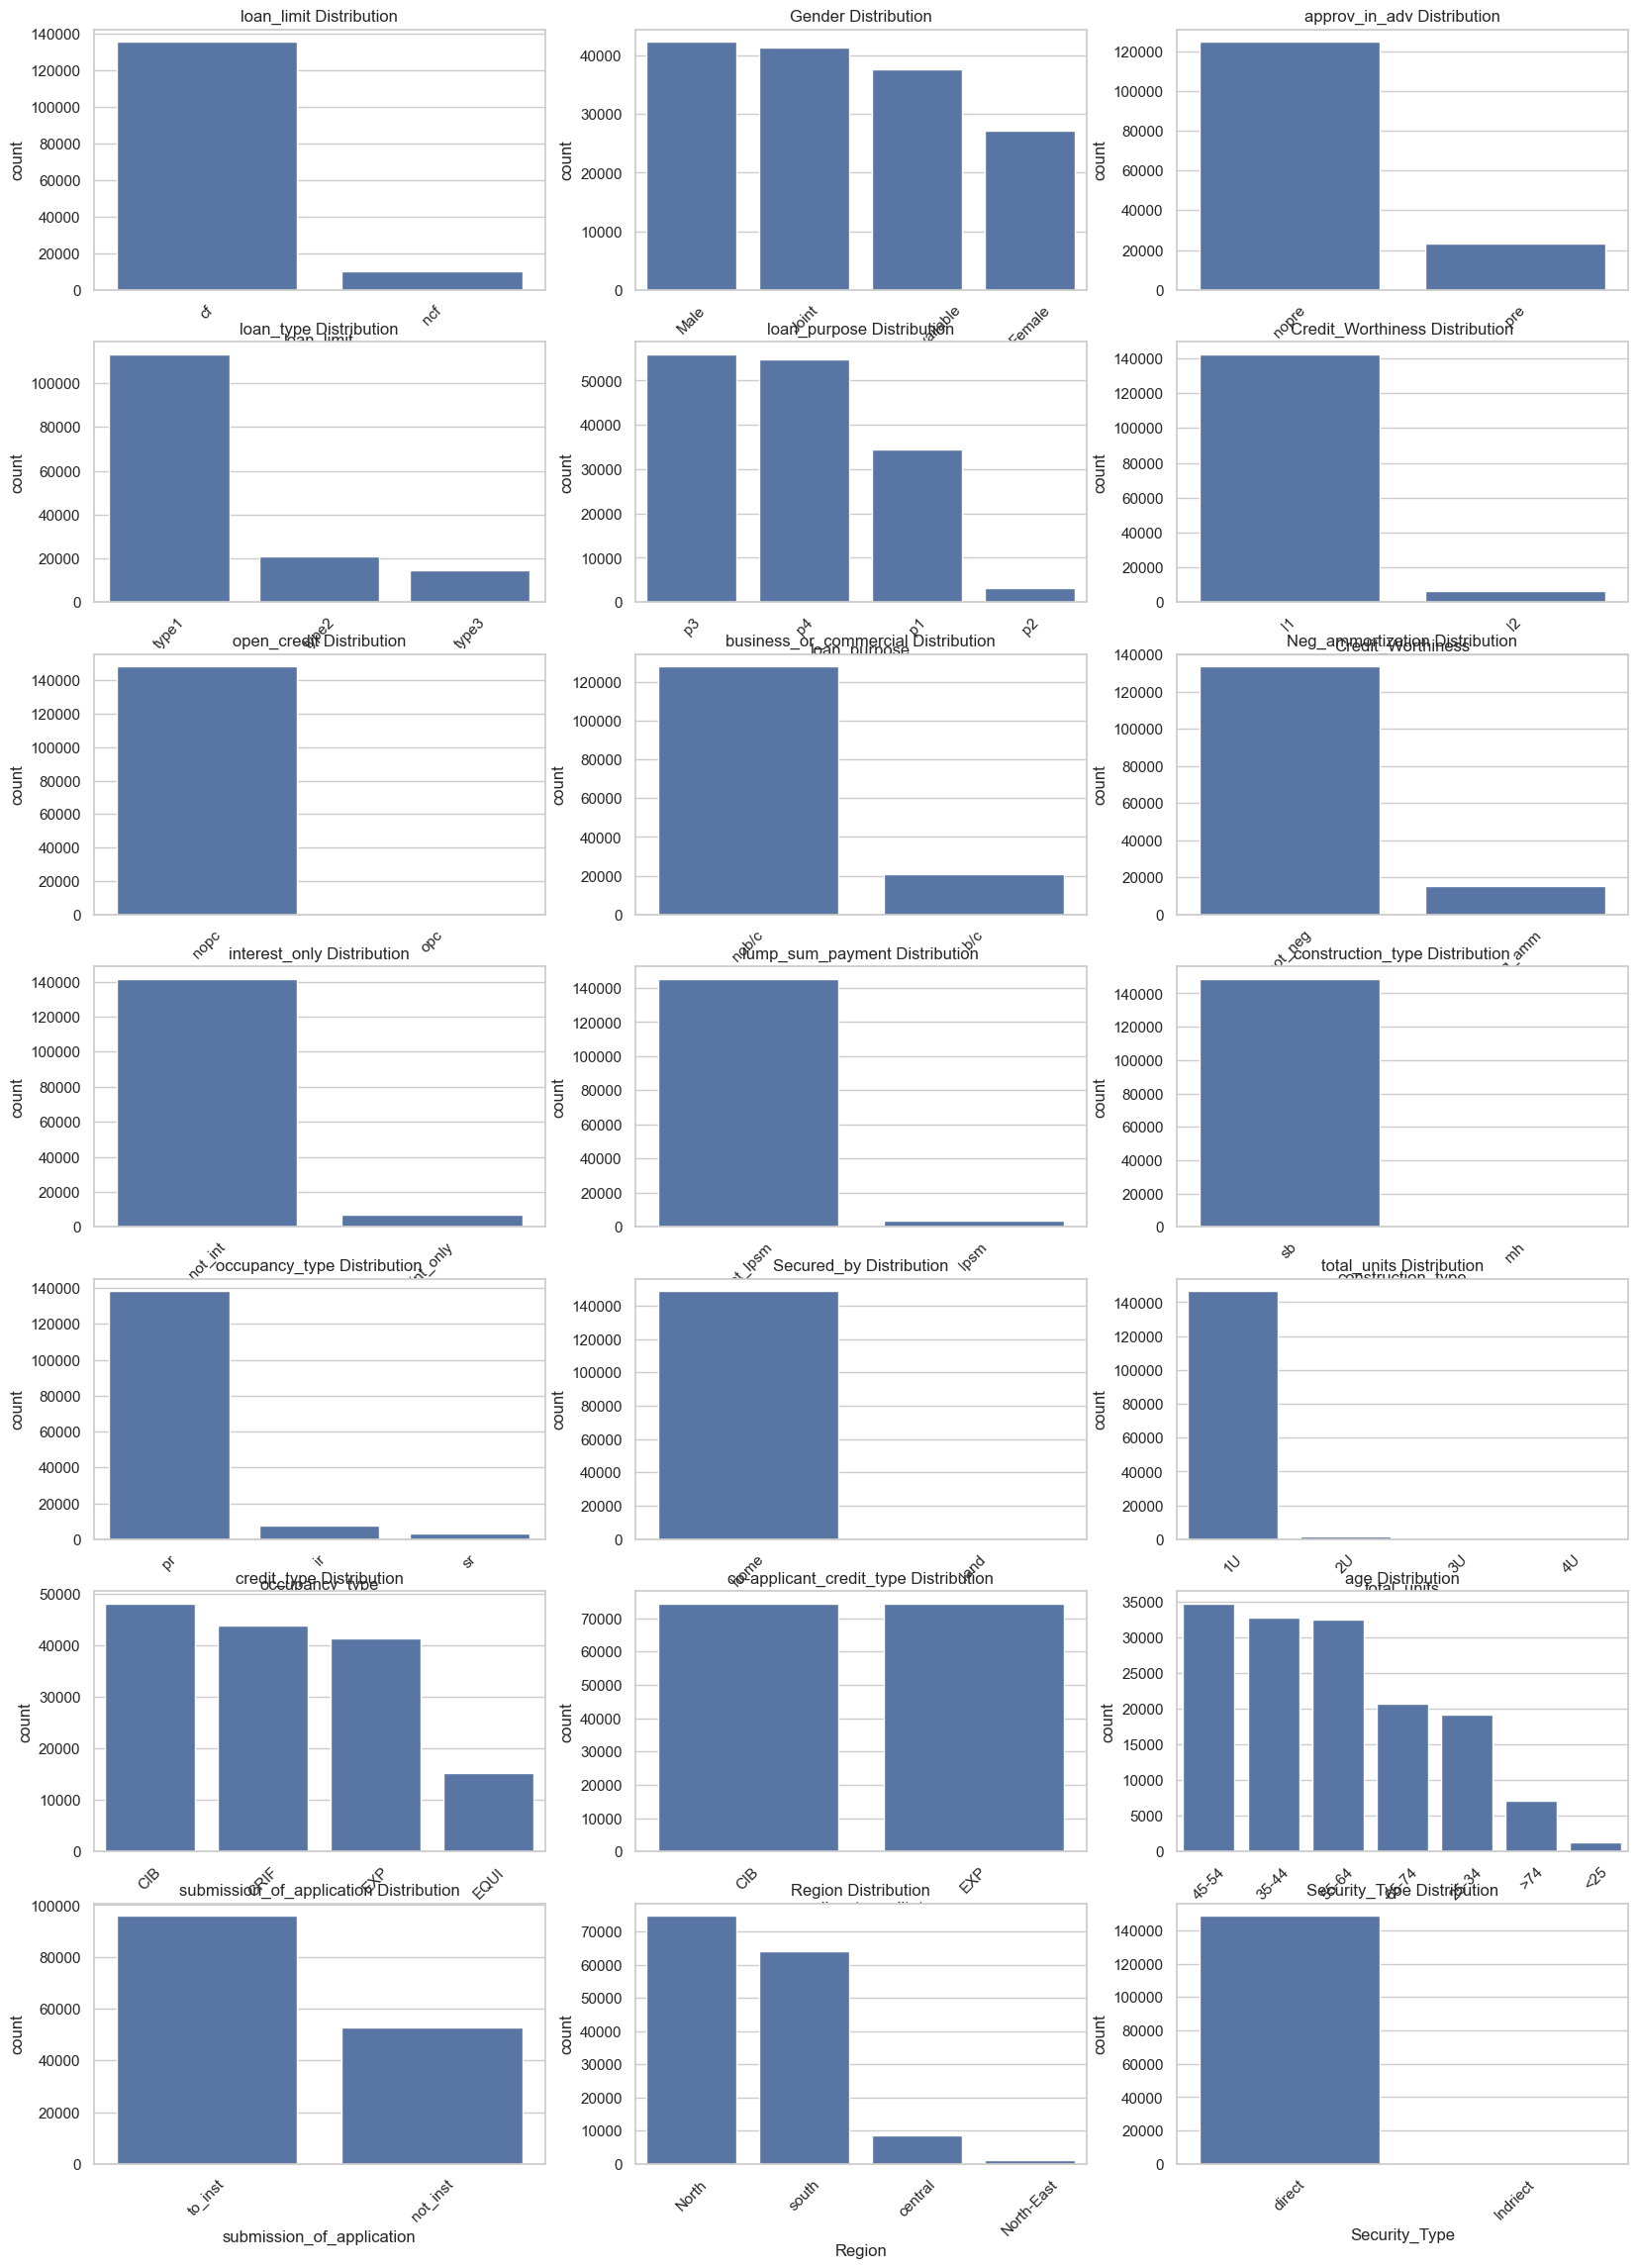

In [10]:
#Barplot for categorical Variables

cat_cols = ['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose',
            'Credit_Worthiness','open_credit','business_or_commercial',
            'Neg_ammortization','interest_only','lump_sum_payment','construction_type',
            'occupancy_type','Secured_by','total_units','credit_type',
            'co-applicant_credit_type','age','submission_of_application',
            'Region','Security_Type']

# Determine number of rows and columns for subplots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # flatten to 1D for easy iteration

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty sub


Categorical Feature Analysis:

Highly imbalanced: loan_limit, approv_in_adv, Credit_Worthiness, business_or_commercial, interest_only, lump_sum_payment, construction_type, occupancy_type, Secured_by, total_units. May require balancing or grouping.

Balanced: Gender, co-applicant_credit_type. Well-represented and good for modeling.

Multiple categories: loan_purpose, credit_type, age, Region, Security_Type, loan_type. Require encoding; some categories may need aggregation.

Special/Contextual: submission_of_application is imbalanced but important for context.

Action: Handle imbalance, encode properly, consider grouping sparse categories, and check predictive value for skewed features.

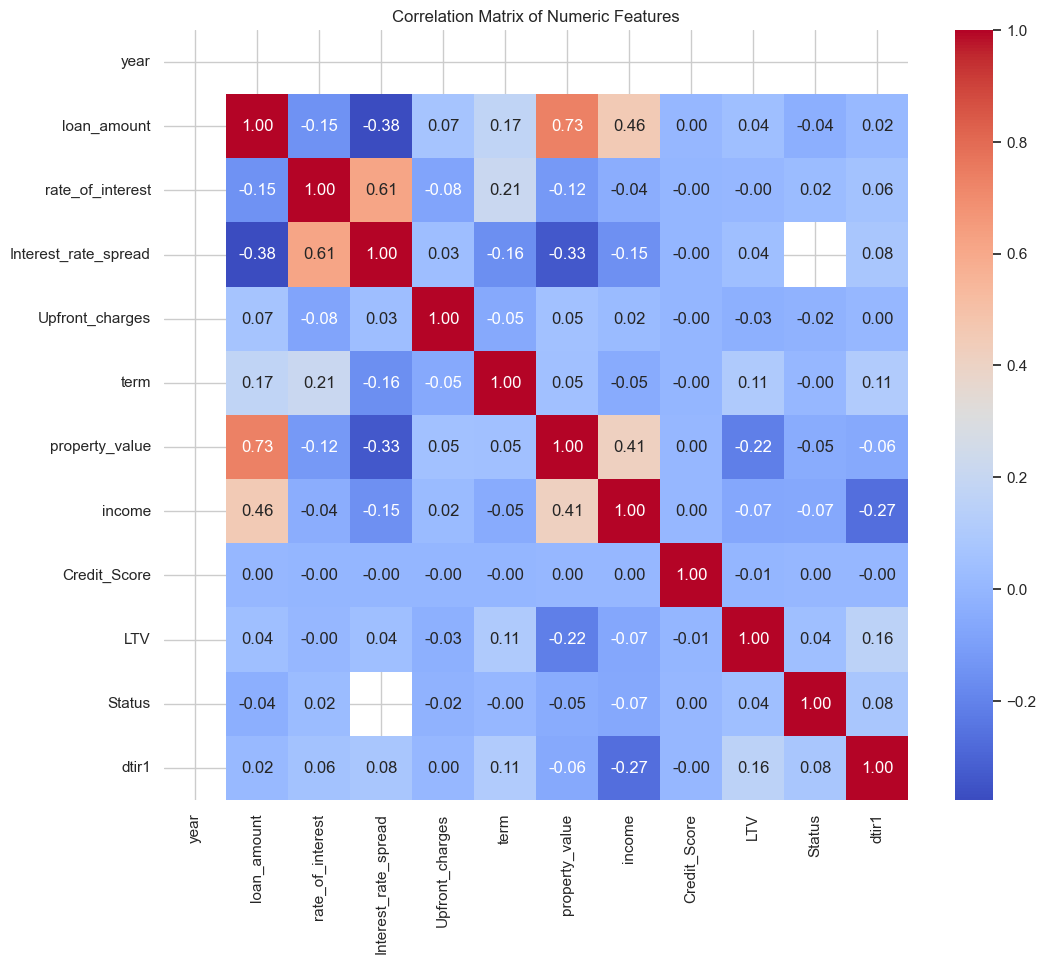

In [11]:
#Corelation Matrix Heatmap
# Select numeric features only
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('ID')  # remove ID as it's just an identifier

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Correlation Insights:

Strong positive: loan_amount ↔ property_value (0.73), loan_amount ↔ income (0.46), property_value ↔ income (0.41), rate_of_interest ↔ Interest_rate_spread (0.61)

Strong negative: Interest_rate_spread ↔ loan_amount (-0.38), income ↔ dtir1 (-0.27)

Weak/negligible: Credit_Score, Upfront_charges, LTV ↔ Status (0.04)

Actionable Notes:

Consider dropping/combining features with multicollinearity.

Derive new features like Loan-to-Income ratio.

Monitor weakly correlated features—they may be useful in non-linear models.

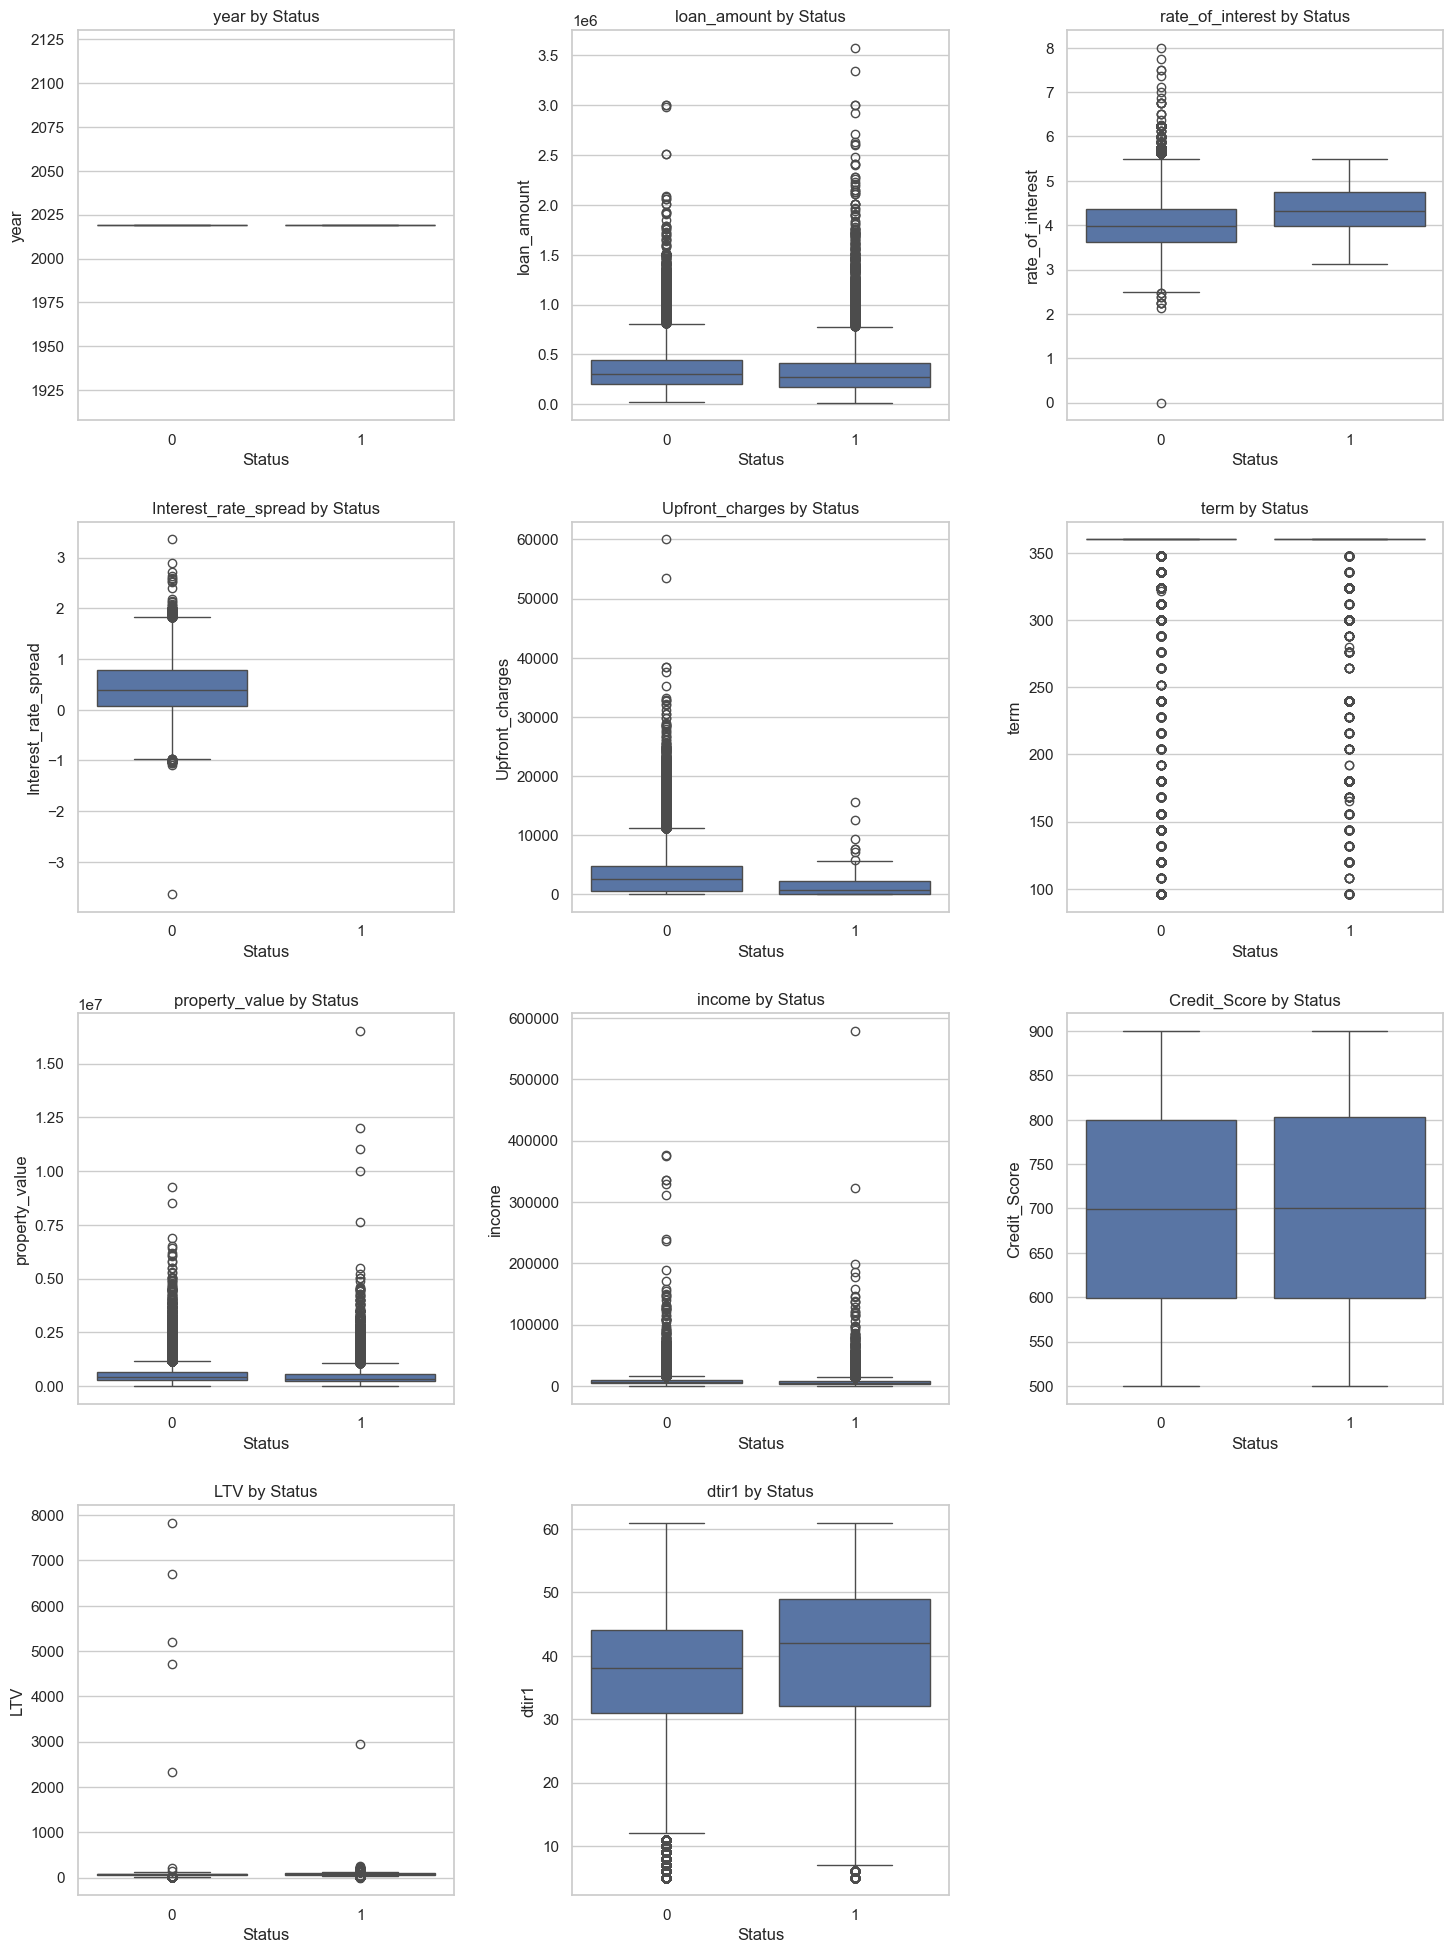

In [12]:
#numeric feature vs Status plots



# Numeric columns excluding ID and Status
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('ID')
num_cols.remove('Status')

# Determine subplot grid size
n_cols = 3  # number of columns per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # total rows needed

plt.figure(figsize=(5*n_cols, 5*n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f"{col} by Status")
    plt.tight_layout(pad=2.0)

plt.show()


Boxplot Insights for Status Prediction

Key predictors: rate_of_interest, Interest_rate_spread, dtir1 (Debt-to-Income Ratio).

Weak predictors: loan_amount, property_value, income, Upfront_charges, Credit_Score, LTV.

Trivial: year, term.

High values of rate, spread, and DTI strongly associate with Status 1. Other features show little separation between Status 0 and 1.

In [13]:
categorical_features = [
    'Gender', 'loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
    'Credit_Worthiness', 'open_credit', 'business_or_commercial',
    'Neg_ammortization', 'interest_only', 'lump_sum_payment',
    'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
    'credit_type', 'co-applicant_credit_type', 'age',
    'submission_of_application', 'Region', 'Security_Type'
]


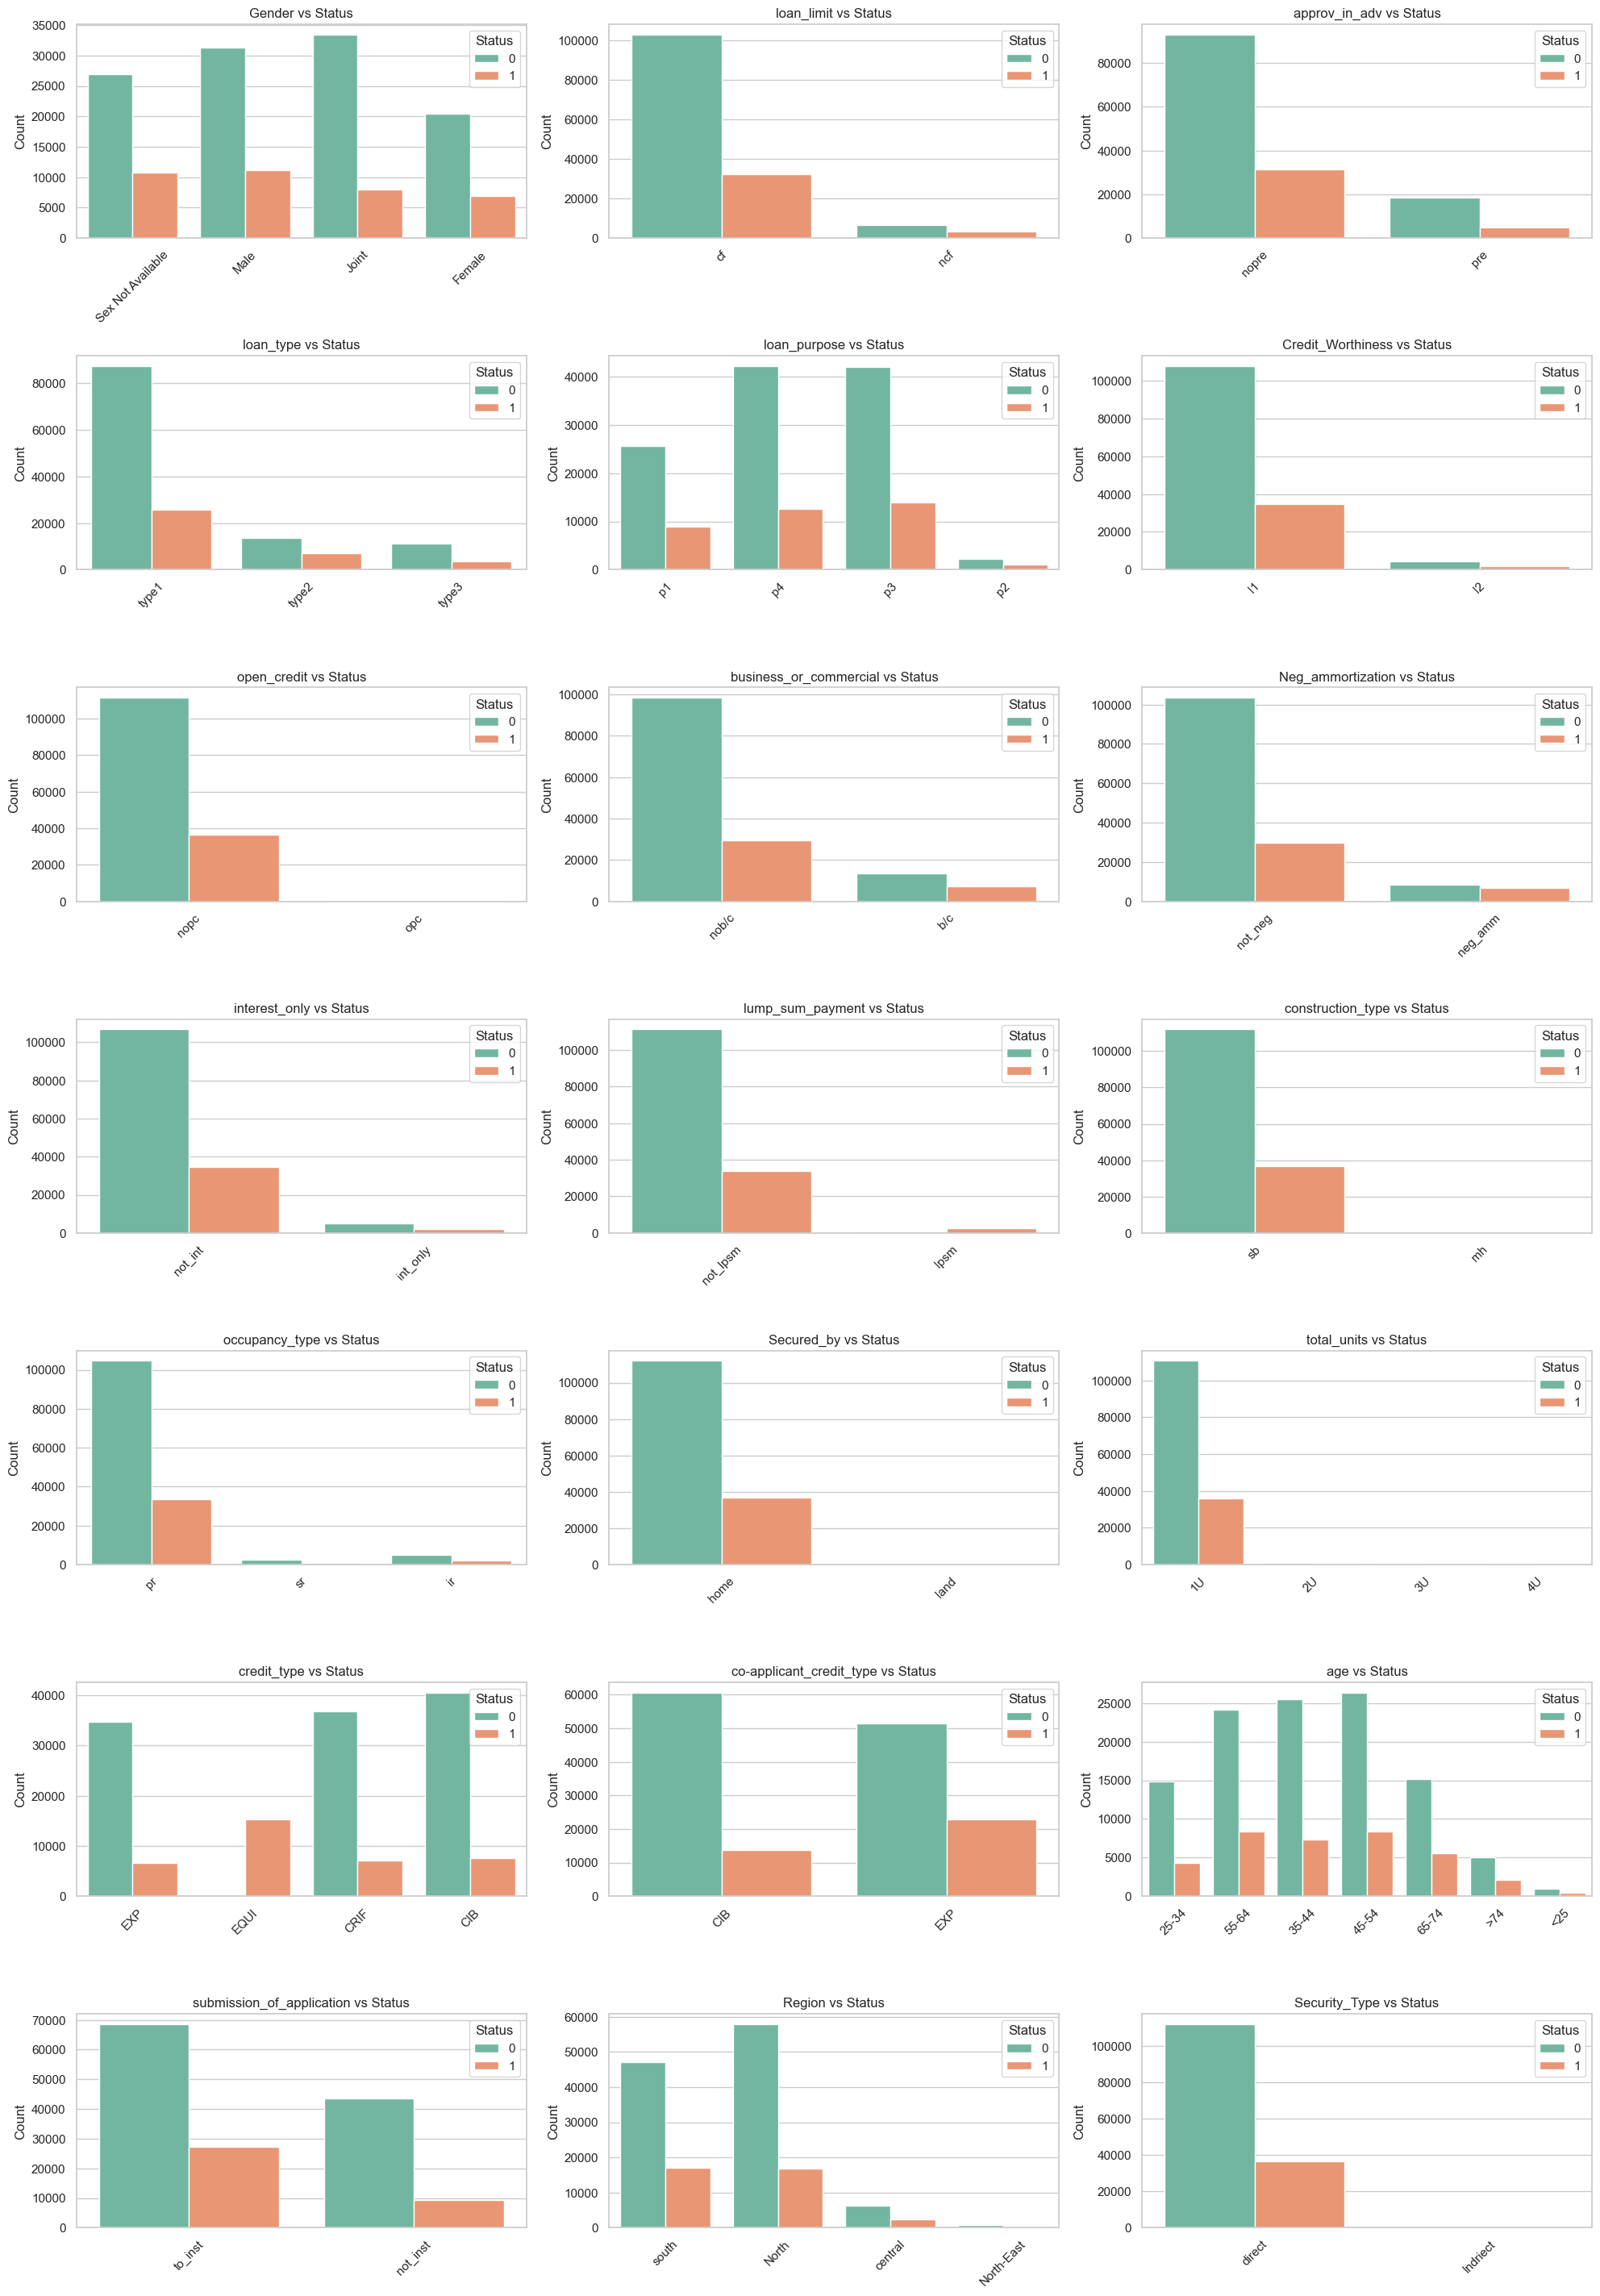

In [14]:
# Plot Status distribution per categorical feature

sns.set(style="whitegrid")
n_cols = 3
n_rows = int(len(categorical_features) / n_cols) + 1
plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Status', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Status')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Status')

plt.tight_layout()
plt.show()


Categorical Feature Analysis vs Status
1. Key Predictive Features

loan_purpose: Category 'A2' has the highest Status 1 count → strong predictor.

loan_type: Type 3 has higher Status 1 proportion → may indicate higher risk.

submission_of_application: 'to_user' category shows higher Status 1 → submission method matters.

Region: 'North' and 'South' dominate; smaller regions have too few observations for strong conclusions.

2. Weak Predictors

Gender, Age, Credit_Worthiness, open_credit, business_or_commercial, construction_type, etc.: Proportions of Status 1 are consistent across categories → weak predictors.

3. Credit Type Features

credit_type: 'EXP' and 'ORB' slightly higher Status 1 proportion.

co-applicant_credit_type: Proportions similar → less influential.

 Overall Insights

Missing Data: Six features need imputation; some missingness is correlated.

Numeric Outliers: income, loan_amount, property_value are skewed → consider log transformation.

Correlations: High correlation between rate_of_interest & Interest_rate_spread → drop one.

Key Predictors: dtir1, rate_of_interest, Interest_rate_spread, loan_purpose ('A2'), submission_of_application.

Low-Importance: Credit_Score, LTV, highly imbalanced features.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


X = train.drop(columns=['Status'])
y = train['Status']


# 1. FEATURE ENGINEERING FUNCTION
def add_features(df):
    df = df.copy()

    # Ratios
    df['loan_to_income'] = df['loan_amount'] / df['income'].replace(0, np.nan)
    df['property_to_income'] = df['property_value'] / df['income'].replace(0, np.nan)

    # Effective interest
    df['effective_rate'] = df['rate_of_interest'] + df['Interest_rate_spread']

    # Binary indicator for high DTI
    df['high_dti'] = (df['dtir1'] > 50).astype(int)

    # Missing indicators
    for col in ['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest',
                'dtir1', 'LTV', 'property_value']:
        df[col + '_missing'] = df[col].isnull().astype(int)

    return df

# Apply once to detect final columns
X_fe = add_features(X)

# 3. DEFINE FINAL COLUMN GROUPS

# Numerical features
num_features = X_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Binary engineered features remove from numeric scaling
binary_like = ['high_dti'] + [c for c in X_fe.columns if c.endswith("_missing")]
num_features = [c for c in num_features if c not in binary_like]

# Categorical features
cat_features = X_fe.select_dtypes(include=['object']).columns.tolist()

# Binary features (0/1 only)
binary_features = binary_like

# 4. SAFE LOG TRANSFORM
def safe_log_transform(X):
    X = pd.DataFrame(X).copy()
    X[X < 0] = np.nan  # Remove negative values
    return np.log1p(X)

# 5. BUILD PIPELINES


numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(safe_log_transform, validate=False)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features),
    ('bin', binary_pipeline, binary_features)
])


# 6. FINAL FULL PIPELINE


full_pipeline = Pipeline(steps=[
    ('feature_engineering', FunctionTransformer(add_features, validate=False)),
    ('preprocessing', preprocessor)
])


# 7. FIT + TRANSFORM
X_processed = full_pipeline.fit_transform(X)

print("\n Preprocessing completed successfully!")
print("Final transformed shape:", X_processed.shape)



 Preprocessing completed successfully!
Final transformed shape: (148670, 81)


 Features handled:

Missing data: Numeric → median, Categorical → mode, Binary → mode

Outliers/skewed numeric features: Log transform (loan_amount, income, property_value, etc.)

Feature scaling: StandardScaler for numeric features

Encoding: One-hot for categorical, binary for 0/1 features

Feature engineering: loan_to_income, property_to_income, effective_rate, high_dti, missing indicators

Multicollinearity: You can drop either rate_of_interest or Interest_rate_spread in the pipeline if needed

Target variable: Assumes Status is already 0/1

In [16]:

# FULL MODELING BLOCK: Feature Engineering + Imputation + Logistic, RF, XGBoost

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#  Train-test split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train_raw.shape)
print("Test shape:", X_test_raw.shape)

#  Feature Engineering Function
def add_features(df):
    df = df.copy()
    
    # Ratios
    df['loan_to_income'] = df['loan_amount'] / df['income'].replace(0, np.nan)
    df['property_to_income'] = df['property_value'] / df['income'].replace(0, np.nan)

    # Effective interest
    df['effective_rate'] = df['rate_of_interest'] + df['Interest_rate_spread']

    # Binary indicator for high DTI
    df['high_dti'] = (df['dtir1'] > 50).astype(int)

    # Missing indicators
    for col in ['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest',
                'dtir1', 'LTV', 'property_value']:
        df[col + '_missing'] = df[col].isnull().astype(int)

    return df

# Apply feature engineering
X_train_fe = add_features(X_train_raw)
X_test_fe = add_features(X_test_raw)
    
#  Immediate numeric imputation for all numeric columns
num_cols_fe = X_train_fe.select_dtypes(include=['float64','int64']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
X_train_fe[num_cols_fe] = num_imputer.fit_transform(X_train_fe[num_cols_fe])
X_test_fe[num_cols_fe] = num_imputer.transform(X_test_fe[num_cols_fe])

#  Identify columns for pipeline
# Binary features (engineered indicators)
binary_features = ['high_dti'] + [c for c in X_train_fe.columns if c.endswith("_missing")]
num_features = [c for c in num_cols_fe if c not in binary_features]

cat_features = X_train_fe.select_dtypes(include=['object']).columns.tolist()

#  Safe log transform
def safe_log_transform(X):
    X = pd.DataFrame(X).copy()
    X[X < 0] = np.nan
    return np.log1p(X)

#  Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline([
    ('passthrough', 'passthrough')  # already numeric 0/1
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features),
    ('bin', binary_pipeline, binary_features)
])

#  Define models
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='saga'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=250,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=4,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    )
}

#  Train + Evaluate
results = {}

for name, model in models.items():
    print("\n" + "="*60)
    print(f"TRAINING: {name}")
    print("="*60)

    # Full pipeline: preprocessing + model
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # Fit model
    pipeline.fit(X_train_fe, y_train)

    # Predict
    y_pred = pipeline.predict(X_test_fe)
    y_proba = pipeline.predict_proba(X_test_fe)[:,1]

    # Metrics
    ACC = accuracy_score(y_test, y_pred)
    PREC = precision_score(y_test, y_pred)
    REC = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    ROC = roc_auc_score(y_test, y_proba)

    results[name] = [ACC, PREC, REC, F1, ROC]

    print(f"Accuracy:   {ACC:.4f}")
    print(f"Precision:  {PREC:.4f}")
    print(f"Recall:     {REC:.4f}")
    print(f"F1 Score:   {F1:.4f}")
    print(f"ROC-AUC:    {ROC:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

#  Display comparison table
results_df = pd.DataFrame(
    results,
    index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
).T

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(results_df)


Train shape: (118936, 33)
Test shape: (29734, 33)

TRAINING: Logistic Regression


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000

Confusion Matrix:
[[22406     0]
 [    0  7328]]

TRAINING: Random Forest
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000

Confusion Matrix:
[[22406     0]
 [    0  7328]]

TRAINING: XGBoost
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000

Confusion Matrix:
[[22406     0]
 [    0  7328]]

MODEL PERFORMANCE SUMMARY
                     Accuracy  Precision  Recall  F1 Score  ROC-AUC
Logistic Regression       1.0        1.0     1.0       1.0      1.0
Random Forest             1.0        1.0     1.0       1.0      1.0
XGBoost                   1.0        1.0     1.0       1.0      1.0


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


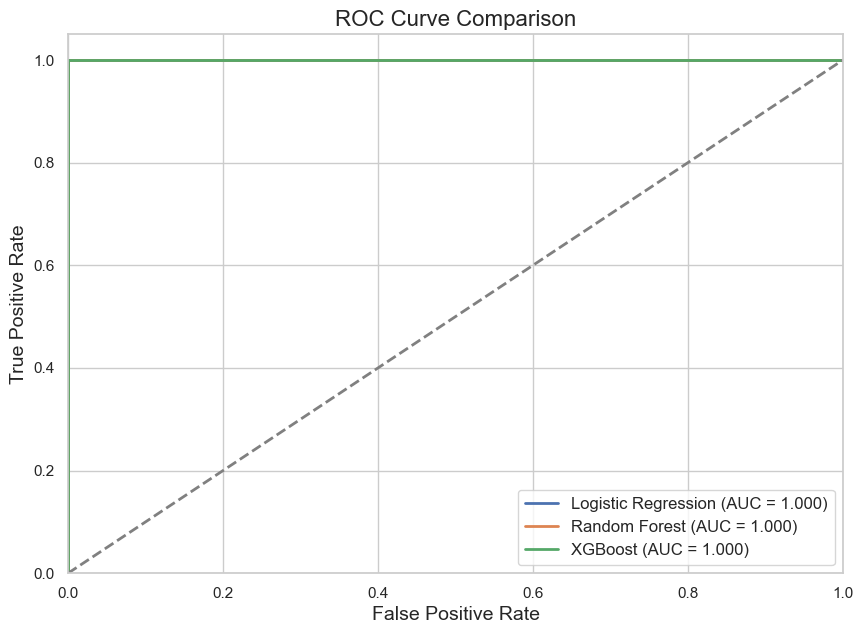

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Re-create the full pipeline with preprocessing + model
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train_fe, y_train)
    
    # Predict probabilities for the positive class
    y_proba = pipeline.predict_proba(X_test_fe)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()
